# Common DEGs and core-accessory genes

This notebook looks to see if the common DEGs, identified using [SOPHIE](https://github.com/greenelab/generic-expression-patterns/blob/master/pseudomonas_analysis/2_identify_generic_genes_pathways.ipynb) are mostly core or accessory genes.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import matplotlib
from matplotlib_venn import venn2
from core_acc_modules import utils, paths

### Get common DEGs

In [2]:
# Read in SOPHIE identified common DEGs (PAO1 gene ids)
common_DEGs_filename = paths.COMMON_DEGS

common_DEGs = pd.read_csv(common_DEGs_filename, sep="\t", index_col=0, header=0)

In [3]:
print(common_DEGs.shape)
common_DEGs.head()

(834, 3)


,Percentile (simulated),prop DEGs,gene id
ProbeID,,,
PA2618_at,97.566691,90.007215,PA2618
PA3479_rhlA_at,85.940880,98.890693,PA3479
PA0512_at,96.268926,74.918831,PA0512
PA3187_at,88.626532,87.626263,PA3187
PA5191_at,86.571738,74.918831,PA5191


In [4]:
common_DEGs = common_DEGs.set_index("gene id")

### Get core/accessory annotations

In [5]:
# Read in expression data
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", index_col=0, header=0)

Note: Core and accessory annotations are from [BACTOME](https://academic.oup.com/nar/article/47/D1/D716/5112984). Not all core genes are measured by our expression dataset ("my dataset") we're using, so there may be a difference in "Number of PAO1 core genes" (core genes from BACTOME) and "Number of PAO1 core genes in my dataset" (core genes that are found in my expression dataset.

In [6]:
pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5357
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 534


In [7]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

### Are common genes mostly core or accessory?

In [8]:
# Get shared gene ids
shared_acc = common_DEGs.index.intersection(pao1_acc)
shared_core = common_DEGs.index.intersection(pao1_core)

In [9]:
common_DEGs.loc[shared_acc, "gene group"] = "accessory"
common_DEGs.loc[shared_core, "gene group"] = "core"

In [10]:
common_DEGs["gene group"].value_counts()

core         806
accessory     27
Name: gene group, dtype: int64

In [11]:
# Add gene name
pao1_gene_annot = pd.read_csv(pao1_annot_filename, index_col=0, header=0)
pao1_gene_annot = pao1_gene_annot["Name"].to_frame("gene name")

In [12]:
common_DEGs_label = common_DEGs.merge(
    pao1_gene_annot, left_index=True, right_index=True
)

In [13]:
common_DEGs_label

,Percentile (simulated),prop DEGs,gene group,gene name
PA2618,97.566691,90.007215,core,NaN
PA3479,85.940880,98.890693,core,rhlA
PA0512,96.268926,74.918831,core,nirH
PA3187,88.626532,87.626263,core,NaN
PA5191,86.571738,74.918831,core,NaN
...,...,...,...,...
PA1088,87.653208,74.918831,core,NaN
PA1999,99.333093,98.890693,core,dchA
PA4298,93.574261,65.773810,core,NaN
PA1473,92.132300,70.571789,core,NaN


### Venn diagram

In [14]:
common_DEGs_set = set(common_DEGs.index)
pao1_core_set = set(pao1_core)
pao1_acc_set = set(pao1_acc)

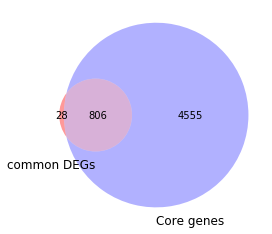

In [15]:
core_common_venn = venn2(
    [common_DEGs_set, pao1_core_set], set_labels=("common DEGs", "Core genes")
)

core_common_venn.get_patch_by_id("11").set_color("purple")
core_common_venn.get_patch_by_id("11").set_edgecolor("none")
core_common_venn.get_patch_by_id("11").set_alpha(0.3)
core_common_venn.get_patch_by_id("01").set_color("blue")
core_common_venn.get_patch_by_id("01").set_edgecolor("none")
core_common_venn.get_patch_by_id("01").set_alpha(0.3)

matplotlib.pyplot.savefig(
    "common_core_venn.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

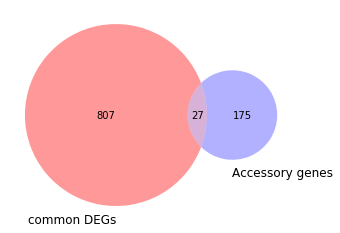

In [16]:
acc_common_venn = venn2(
    [common_DEGs_set, pao1_acc_set], set_labels=("common DEGs", "Accessory genes")
)

acc_common_venn.get_patch_by_id("11").set_color("purple")
acc_common_venn.get_patch_by_id("11").set_edgecolor("none")
acc_common_venn.get_patch_by_id("11").set_alpha(0.3)
acc_common_venn.get_patch_by_id("01").set_color("blue")
acc_common_venn.get_patch_by_id("01").set_edgecolor("none")
acc_common_venn.get_patch_by_id("01").set_alpha(0.3)

matplotlib.pyplot.savefig(
    "common_acc_venn.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

In [17]:
# Save
common_DEGs_label.to_csv("common_DEGs_gene_group_labeled.tsv", sep="\t")

**Takeaway:**

Looks like most common DEGs are core, as expected. It is thought that these core genes encode essential functions shared by all strains and so it would make sense that these core genes are also those commonly DEGs.